Oral Cancer - VGG19

In [1]:
#                                                  virtual env : py310

import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
#processed combination path
PATH_IMAGES = 'D:\Development\machine_learning\PROJECTS\oral_cancer_project\datasets\images\preprocessing_images\processed_data'
os.listdir(PATH_IMAGES)

['combination_of_two_datasets',
 'kag_dataset1_new_dir',
 'kag_dataset2_new_dir',
 'mendley_new',
 'processed_combination',
 'super_resolution_images']

In [3]:
# Directories
'''
import splitfolders

input_folder = PATH_IMAGES  + '/super_resolution_images'  
# os.listdir(input_folder)     

splitfolders.ratio(input_folder, output='./oc_datasets/super_resolution_images_split/train_test_split', 
                   seed=42, ratio=(.7,.2,.1),
                   group_prefix=None)


# i made the train test and val datasets from this on disk so no need to do it again next time on this project

'''

"\nimport splitfolders\n\ninput_folder = PATH_IMAGES  + '/super_resolution_images'  \n# os.listdir(input_folder)     \n\nsplitfolders.ratio(input_folder, output='./oc_datasets/super_resolution_images_split/train_test_split', \n                   seed=42, ratio=(.7,.2,.1),\n                   group_prefix=None)\n\n\n# i made the train test and val datasets from this on disk so no need to do it again next time on this project\n\n"

In [4]:
#Load and preprocessing data

train_dir = './oc_datasets/super_resolution_images_split/train_test_split/train'
valid_dir = './oc_datasets/super_resolution_images_split/train_test_split/val'
test_dir = './oc_datasets/super_resolution_images_split/train_test_split/test'

# print(os.listdir(train_dir))
# print(os.listdir(test_dir))
# print(os.listdir(valid_dir))
img_width , img_height = 224, 224
batch_size = 32

#creating datagenerators
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary'
)

test_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary'
)




Found 545 images belonging to 2 classes.


Found 155 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [5]:
#loading VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in base_model.layers:
    layer.trainable = False


In [27]:
#creating model on top of vgg16
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_7 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49,278,337
Trainable params: 25,690,625
Non-trainable params: 23,587,712
_________________________________________________________________


In [28]:
#defining training and validation steps
train_steps_per_epoch = train_generator.n
# print(train_steps_per_epoch)
valid_steps_per_epoch = valid_generator.n

#training model
history = model.fit(
    train_generator,
    # steps_per_epoch = train_steps_per_epoch,
    epochs = 8,
    validation_data = valid_generator,
    # validation_steps = valid_steps_per_epoch
)

Epoch 1/8
18/18 [==============================] - 12s 584ms/step - loss: 4.5112 - accuracy: 0.4844 - val_loss: 0.6829 - val_accuracy: 0.6065
Epoch 2/8
18/18 [==============================] - 10s 536ms/step - loss: 0.7706 - accuracy: 0.4752 - val_loss: 0.6930 - val_accuracy: 0.5161
Epoch 3/8
18/18 [==============================] - 10s 540ms/step - loss: 0.6933 - accuracy: 0.5138 - val_loss: 0.6930 - val_accuracy: 0.5161
Epoch 4/8
18/18 [==============================] - 10s 542ms/step - loss: 0.6981 - accuracy: 0.5138 - val_loss: 0.6931 - val_accuracy: 0.5161
Epoch 5/8
18/18 [==============================] - 10s 533ms/step - loss: 0.6932 - accuracy: 0.5138 - val_loss: 0.6932 - val_accuracy: 0.5097
Epoch 6/8
18/18 [==============================] - 10s 566ms/step - loss: 0.6931 - accuracy: 0.5138 - val_loss: 0.6931 - val_accuracy: 0.5097
Epoch 7/8
18/18 [==============================] - 10s 544ms/step - loss: 0.6970 - accuracy: 0.5266 - val_loss: 0.6931 - val_accuracy: 0.5161
Epoch 

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes for the test dataset
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)  # Assuming binary classification with threshold 0.5

# Get true classes
true_classes = test_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



3/3 [==============================] - 1s 299ms/step
Confusion Matrix:
[[40  0]
 [39  0]]


Text(0, 0.5, 'Loss')

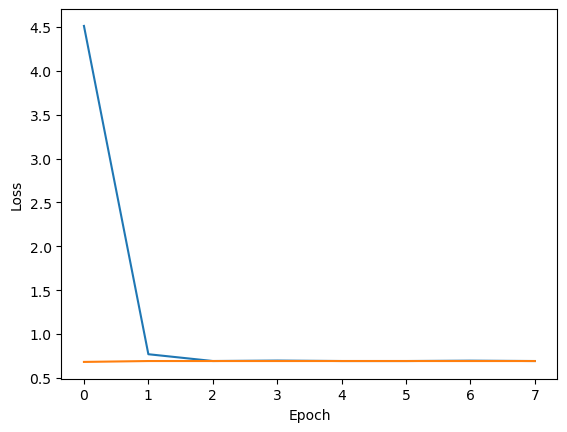

In [30]:
#ploting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label=['Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [11]:






# # testing on my images ( user input images )

# user_test_dir = './oc-dataset/kag1/user_test_images'

# user_test_generator = test_datagen.flow_from_directory(
#     user_test_dir,
#     target_size = (img_width, img_height),
#     batch_size = batch_size,
#     class_mode = 'binary'
# )











In [12]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predictions = model.predict(user_test_generator)
# y_true = test_generator.classes
# y_pred = np.round(predictions).reshape(-1)

# confusion_matrix =confusion_matrix(y_true, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=user_test_generator.class_indices.keys())
# disp.plot()
# plt.show()

RESNET Model

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model

In [14]:
PATH_super_resolution_images = 'D:\Development\machine_learning\PROJECTS\oral_cancer_project\datasets\images\preprocessing_images\processed_data\super_resolution_images'
# os.listdir(PATH_super_resolution_images)

In [15]:
#load Data
def load_data(folder_path):
    images = []
    labels = []
    for label, category in enumerate(['cancer', 'non_cancer']):
        category_folder = os.path.join(folder_path, category)
        for file_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, file_name)
            image = load_img(image_path, target_size=(224, 224))  # Adjust target size as needed
            image_array = img_to_array(image)
            images.append(image_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [16]:
folder_path = PATH_super_resolution_images
images, labels = load_data(folder_path)
images

array([[[[156., 114., 102.],
         [166., 119., 109.],
         [164., 122., 110.],
         ...,
         [ 23.,  22.,   1.],
         [ 26.,  25.,   4.],
         [ 28.,  27.,   6.]],

        [[154., 111., 102.],
         [166., 122., 113.],
         [168., 125., 116.],
         ...,
         [ 82.,  80.,  83.],
         [ 85.,  83.,  84.],
         [ 88.,  86.,  87.]],

        [[157., 114., 107.],
         [169., 124., 118.],
         [172., 129., 122.],
         ...,
         [ 88.,  88.,  88.],
         [ 93.,  93.,  93.],
         [ 91.,  91.,  91.]],

        ...,

        [[ 52.,  37.,  30.],
         [ 76.,  47.,  33.],
         [ 81.,  45.,  29.],
         ...,
         [128., 130., 168.],
         [118., 123., 161.],
         [104., 119., 142.]],

        [[ 32.,  19.,  10.],
         [ 48.,  20.,   8.],
         [ 62.,  29.,  14.],
         ...,
         [120., 128., 174.],
         [117., 122., 164.],
         [108., 113., 151.]],

        [[  3.,   3.,   5.],
       

In [17]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, shuffle=True)


In [18]:
# Define and compile the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [19]:
# Add your own classification layers on top of the ResNet-50 base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

model_resnet50 = Model(inputs=base_model.input, outputs=predictions)



In [20]:
model_resnet50.compile(loss='binary_crossentropy',metrics=[
    'accuracy',
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall()],
    optimizer='adam')


In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
checkpoint_filepath = '/kaggle/working/best_model_resnet.keras'
checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',  # Save the model based on validation accuracy
    save_best_only=True,      # Only save the best model
    mode='max',               # Save the model when the monitored quantity is maximized
    verbose=1
)


In [22]:

# Training model
history = model_resnet50.fit(
    x= X_train,
    y= y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr,checkpoint]
)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.6268 - accuracy: 0.6019 - precision: 0.5971 - recall: 0.5497
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to /kaggle/working\best_model_resnet.keras
20/20 [==============================] - 6s 189ms/step - loss: 1.6268 - accuracy: 0.6019 - precision: 0.5971 - recall: 0.5497 - val_loss: 0.5207 - val_accuracy: 0.7500 - val_precision: 0.7879 - val_recall: 0.6753 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.4955 - accuracy: 0.7480 - precision: 0.7526 - recall: 0.7152
Epoch 2: val_accuracy did not improve from 0.75000
20/20 [==============================] - 2s 122ms/step - loss: 0.4955 - accuracy: 0.7480 - precision: 0.7526 - recall: 0.7152 - val_loss: 0.5954 - val_accuracy: 0.6923 - val_precision: 0.6330 - val_recall: 0.8961 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.7881 - precision: 0.8080 - recall: 0.

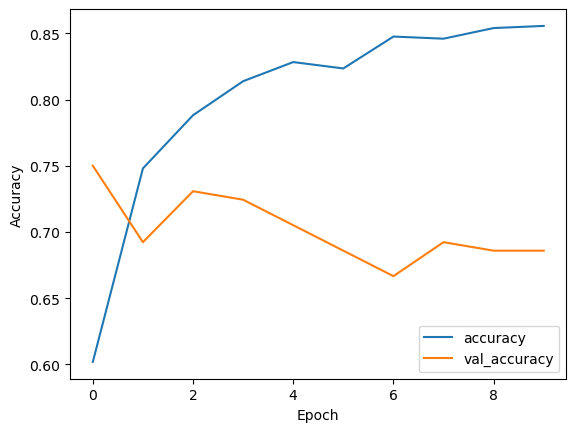

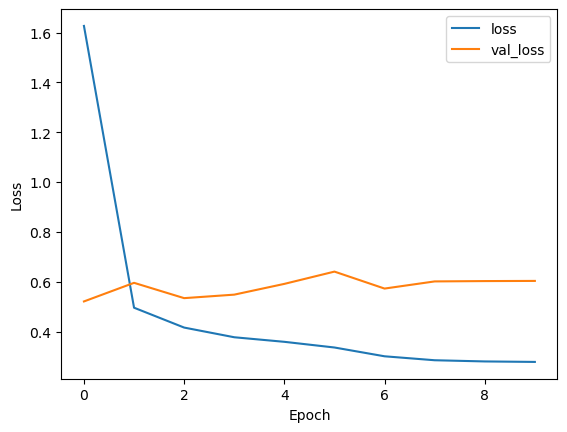

In [23]:

#  accuracy vsloss plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

